# **Download from Drive**

---



In [ ]:
!gdown --id '1Wt9o_mq6KrVcrpxR0Nt65pB2iQtbTQfZ'

Downloading...
From: https://drive.google.com/uc?id=1Wt9o_mq6KrVcrpxR0Nt65pB2iQtbTQfZ
To: /content/Dataset_A.zip
815MB [00:07, 102MB/s]


# **Unzip**

---



In [ ]:
!unzip '/content/Dataset_A.zip'

Streaming output truncated to the last 5000 lines.
  inflating: training-a/a14702.png   
  inflating: training-a/a14703.png   
  inflating: training-a/a14704.png   
  inflating: training-a/a14705.png   
  inflating: training-a/a14706.png   
  inflating: training-a/a14707.png   
  inflating: training-a/a14708.png   
  inflating: training-a/a14709.png   
  inflating: training-a/a14710.png   
  inflating: training-a/a14711.png   
  inflating: training-a/a14712.png   
  inflating: training-a/a14713.png   
  inflating: training-a/a14714.png   
  inflating: training-a/a14715.png   
  inflating: training-a/a14716.png   
  inflating: training-a/a14717.png   
  inflating: training-a/a14718.png   
  inflating: training-a/a14719.png   
  inflating: training-a/a14720.png   
  inflating: training-a/a14721.png   
  inflating: training-a/a14722.png   
  inflating: training-a/a14723.png   
  inflating: training-a/a14724.png   
  inflating: training-a/a14725.png   
  inflating: training-a/a14726.png   

# **Remove Zip**

---



In [ ]:
!rm '/content/Dataset_A.zip'
print("removed")

removed


# **Imports**

---



In [ ]:
import os
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import make_grid
!pip install torchviz
from torchviz import make_dot
import PIL
import random
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("training-a.csv")
df = df.loc[:, ['filename','digit']]

# **Data Preprocessing**

---



In [ ]:
class processDataset(Dataset):

    def __init__(self, root, image_dir, csv_file, transform=None):
        self.root = root
        self.image_dir = image_dir
        self.image_files = csv_file.iloc[:, 0]
        self.data = csv_file.iloc[:, 1]
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image_name = os.path.join(self.image_dir, self.image_files[index])
        image = PIL.Image.open(image_name)
        label = self.data[index]
        if self.transform:
            image = self.transform(image)
        return (image, label)

In [ ]:
root = Path(os.getcwd())
image_dir = root/'training-a'
csv_file = df
mean = [0.5,]
std = [0.5, ]
transform_img = transforms.Compose([
                            transforms.Grayscale(),
                            transforms.Resize(28),
                            # transforms.CenterCrop(28),
                            transforms.ToTensor(),
                            transforms.Normalize(mean, std)
])

In [ ]:
dset = processDataset(root, image_dir, csv_file, transform= transform_img)
dset_size = len(dset)
test_perc = 20
test_size = int(dset_size * (test_perc/100))
train_size = dset_size - test_size
train_dataset, test_dataset = torch.utils.data.random_split(dset, [train_size, test_size])

In [ ]:
print(dset_size, test_size, train_size)

19702 3940 15762


# **Data Visualization**

---



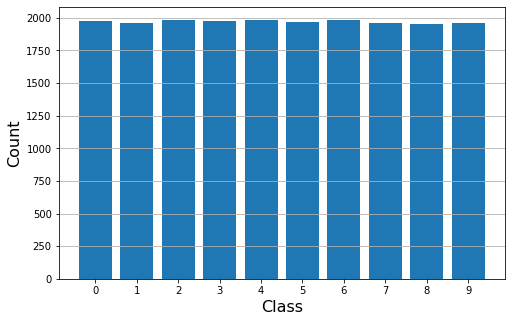

In [ ]:
df1 = pd.read_csv("training-a.csv")
plt.rcParams['figure.figsize'] = (8, 5)
plt.bar(df1['digit'].value_counts().index, df1['digit'].value_counts())
plt.xticks(np.arange(10))
plt.xlabel('Class', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.grid('on', axis='y')

Label: 5
Label: 2
Label: 0
Label: 4
Label: 7
Label: 8
Label: 0
Label: 7


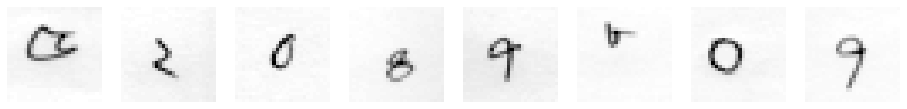

In [ ]:
def get_image(image, label, dataset):
    print(f"Label: {label}")
    image = image.permute(1,2,0)
    image = image[:,:,0]
    # plt.imshow(image,cmap='gray')
    # plt.show()
    return image
plt.rcParams['figure.figsize'] = (16, 2)
for i in range(1,9):
  img = get_image(*train_dataset[i], train_dataset)
  plt.subplot(1, 8, i)
  plt.axis('off')
  plt.imshow(img,cmap='gray')
plt.show()

# **EXP_02_trial_1**

---



In [ ]:
# Hyperparameters
batch_size = 200
num_iters = 20000
input_dim = 28*28
output_dim = 10
learning_rate = 0.01

In [ ]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, 700)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(700, 600)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(600, 500)
        self.relu_3 = nn.ReLU()

        # self.linear_4 = nn.Linear(500, 400)
        # self.relu_4 = nn.ReLU()

        # self.linear_5 = nn.Linear(300, 200)
        # self.relu_5 = nn.ReLU()

        # self.linear_6 = nn.Linear(200, 100)
        # self.relu_6 = nn.ReLU()

        self.linear_out = nn.Linear(500, num_classes)
        self.relu_out = nn.ReLU()

    def forward(self, x):
        
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)

        # out  = self.linear_4(out)
        # out = self.relu_4(out)

        # out  = self.linear_5(out)
        # out = self.relu_5(out)

        # out  = self.linear_6(out)
        # out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        probas  = self.relu_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 4.829926013946533. Accuracy: 16.16751269035533
Iteration: 1000. Loss: 4.964694023132324. Accuracy: 9.035532994923859
Iteration: 1500. Loss: 4.834512710571289. Accuracy: 9.035532994923859
Iteration: 2000. Loss: 4.951739311218262. Accuracy: 9.949238578680204
Iteration: 2500. Loss: 5.100386142730713. Accuracy: 13.781725888324873
Iteration: 3000. Loss: 4.963915824890137. Accuracy: 8.98477157360406
Iteration: 3500. Loss: 4.883450508117676. Accuracy: 18.756345177664976
Iteration: 4000. Loss: 5.206950664520264. Accuracy: 14.873096446700508
Iteration: 4500. Loss: 5.083102226257324. Accuracy: 22.360406091370557
Iteration: 5000. Loss: 4.704159736633301. Accuracy: 18.299492385786802
Iteration: 5500. Loss: 4.368056774139404. Accuracy: 14.746192893401016
Iteration: 6000. Loss: 4.423001289367676. Accuracy: 16.700507614213198
Iteration: 6500. Loss: 4.618468284606934. Accuracy: 16.97969543147208
Iteration: 7000. Loss: 3.905576467514038. Accuracy: 20.228426395939085
Iteration: 750

# **EXP_02_trial_2**

---



In [ ]:
# Hyperparameters
batch_size = 32
num_iters = 125000
input_dim = 28*28
output_dim = 10
learning_rate = 0.0001

In [ ]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, 512)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(512, 256)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(256, 128)
        self.relu_3 = nn.ReLU()

        self.linear_out = nn.Linear(128, num_classes)
        self.relu_out = nn.ReLU()

    def forward(self, x):
        
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)
        
        probas  = self.linear_out(out)
        probas  = self.relu_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
test_loss_min = 9999999
iter_data,train_loss_data, test_loss_data, acc_data = [], [], [], []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, input_dim).to(device)
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                loss = criterion(outputs, labels)

                test_loss += loss.item() * images.size(0)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            train_loss = train_loss / len(train_loader.dataset)
            test_loss = test_loss / len(test_loader.dataset)
            train_loss_data.append(train_loss)
            test_loss_data.append(test_loss)
            accuracy = 100 * correct.item() / total
            acc_data.append(accuracy)
            iter_data.append(iter)

            # Print Loss
            print('Iteration: {}. Train_Loss: {}. Valid_Loss: {}. Accuracy: {}'.format(iter, train_loss, test_loss, accuracy))

            if test_loss <= test_loss_min:
              print('***Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...***'.format(test_loss_min,test_loss))
              torch.save(model.state_dict(), 'EXP_02_trial_2.pt')
              test_loss_min = test_loss

Iteration: 500. Train_Loss: 0.032584816833813625. Valid_Loss: 2.2940107263284286. Accuracy: 10.862944162436548
***Validation loss decreased (9999999.000000 --> 2.294011). Saving model ...***
Iteration: 1000. Train_Loss: 0.065013131368071. Valid_Loss: 2.2725239579447636. Accuracy: 10.203045685279188
***Validation loss decreased (2.294011 --> 2.272524). Saving model ...***
Iteration: 1500. Train_Loss: 0.09423664617229878. Valid_Loss: 2.2127722880561946. Accuracy: 19.64467005076142
***Validation loss decreased (2.272524 --> 2.212772). Saving model ...***
Iteration: 2000. Train_Loss: 0.11992331486549372. Valid_Loss: 2.1118005348341113. Accuracy: 33.45177664974619
***Validation loss decreased (2.212772 --> 2.111801). Saving model ...***
Iteration: 2500. Train_Loss: 0.13949910548567968. Valid_Loss: 1.9752586686671687. Accuracy: 37.411167512690355
***Validation loss decreased (2.111801 --> 1.975259). Saving model ...***
Iteration: 3000. Train_Loss: 0.16056135405351812. Valid_Loss: 1.877313702

## **Loss Graph**

---



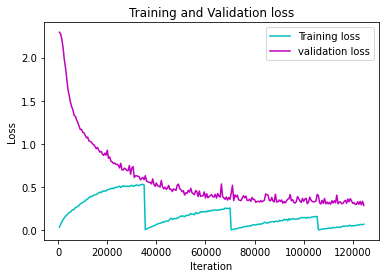

In [ ]:
plt.plot(iter_data, train_loss_data, 'c', label='Training loss')
plt.plot(iter_data, test_loss_data, 'm', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Accuracy Graph**

---



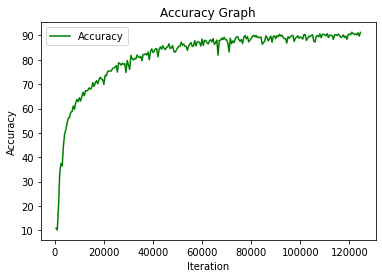

In [ ]:
plt.plot(iter_data, acc_data, 'g', label='Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Model Visualization**

---



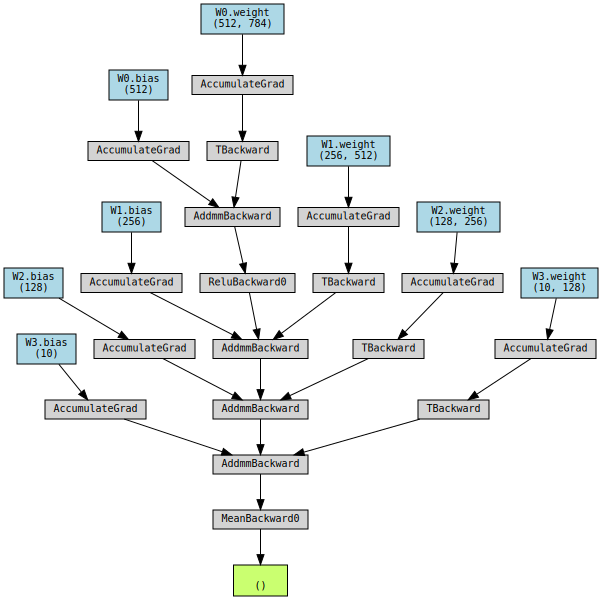

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model1 = nn.Sequential()
model1.add_module('W0', nn.Linear(28*28, 512))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W1', nn.Linear(512, 256))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W2', nn.Linear(256, 128))
model1.add_module('ReLU', nn.ReLU())
model1.add_module('W3', nn.Linear(128, 10))
model1.add_module('ReLU', nn.ReLU())


xx = torch.randn(32,784)
yy = model1(xx)

make_dot(yy.mean(), params=dict(model1.named_parameters()))